# Predict CLTV with linear regression

<a id='table'></a>
## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#dw">Data wrangling</a></li>
<li><a href="#eda">Exploratory data analysis</a></li>
<li><a href="#datacleaning">Data cleaning and transformation</a></li>
<li><a href="#dataanalysis">Data analysis</a></li>
<li><a href="#predictcltv">Predict 3-month CLTV</a></li>
<li><a href="#summary">Summary</a></li>
<li><a href="#reference">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

### CLTV

**Customer Lifetime Value (CLTV)** represents the total amount of money a customer is expected to spend in a business during his/her lifetime. This is an important metric to monitor because it helps to make decisions about how much money to invest in acquiring new customers and retaining existing ones.

### Dataset

For this analysis I am using a public dataset from UCI Machine Learning Repositiry, which can found [here](http://archive.ics.uci.edu/ml/index.php). This dataset contains information on transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**Attribute information:**

* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation
* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal
* Quantity: The quantities of each product (item) per transaction. Numeric
* InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated
* UnitPrice: Unit price. Numeric, Product price per unit in sterling
* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer
* Country: Country name. Nominal, the name of the country where each customer resides.

<a id='dw'></a>
## Data wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_excel('Online Retail.xlsx', sheet_name='Online Retail')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [99]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
count,380580.0,380580,380580,380580.000000,380580,380580.000000,380580.000000,380580,380580.000000
unique,17754.0,3657,3868,NaN,NaN,NaN,NaN,37,NaN
top,576339.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom,NaN
freq,542.0,1976,1976,NaN,NaN,NaN,NaN,338520,NaN
mean,NaN,NaN,NaN,12.823582,2011-07-04 06:37:07.966104320,3.134235,15293.531778,NaN,22.053747
min,NaN,NaN,NaN,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,NaN,0.001000
25%,NaN,NaN,NaN,2.000000,2011-04-01 13:00:00,1.250000,13969.000000,NaN,4.950000
50%,NaN,NaN,NaN,6.000000,2011-07-21 11:55:00,1.950000,15159.000000,NaN,11.900000
75%,NaN,NaN,NaN,12.000000,2011-10-12 14:48:00,3.750000,16793.000000,NaN,19.800000
max,NaN,NaN,NaN,74215.000000,2011-11-30 17:37:00,8142.750000,18287.000000,NaN,77183.600000


*Description* and *CustomerID* columns have NULL values

In [100]:
df.shape

(380580, 9)

<a id='eda'></a>
## Exploratory data analysis (EDA)

Let us have a look at the data and decide whether we need any data cleaning and data transformation for further analysis.

### NULL values

In [7]:
print('Number of missing values in the dataset:', df.isnull().sum().sum())
print('Percentage of missing values in the dataset:', df.isnull().sum().sum()*100/(df.shape[0]*df.shape[1]))

Number of missing values in the dataset: 136534
Percentage of missing values in the dataset: 3.149375633178264


In [8]:
print("Number of missing values in 'Description' column:", df['Description'].isnull().sum())
print("Percentage of missing values in 'Description' column:", df['Description'].isnull().sum()*100/df.shape[0])

Number of missing values in 'Description' column: 1454
Percentage of missing values in 'Description' column: 0.2683107311375157


In [9]:
print("Number of missing values in 'CustomerID' column:", df['CustomerID'].isnull().sum())
print("Percentage of missing values in 'CustomerID' column:", df['CustomerID'].isnull().sum()*100/df.shape[0])

Number of missing values in 'CustomerID' column: 135080
Percentage of missing values in 'CustomerID' column: 24.926694334288598


About 25% of CustomerIDs is missing

### Duplicates

In [10]:
# Check the number of duplicated values
df.duplicated().sum().sum()

5268

In [11]:
# Let's get the duplicated rows
duplicates = df[df.duplicated()]

In [12]:
duplicates[:20]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
587,536412,22273,FELTCRAFT DOLL MOLLY,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
589,536412,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,1,2010-12-01 11:49:00,3.75,17920.0,United Kingdom
594,536412,22141,CHRISTMAS CRAFT TREE TOP ANGEL,1,2010-12-01 11:49:00,2.10,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom
600,536412,22569,FELTCRAFT CUSHION BUTTERFLY,2,2010-12-01 11:49:00,3.75,17920.0,United Kingdom


It seems that products, which were bought together in one invoice, were considered as duplicates. However, there are no duplicates, if we look at the *Description* column

### Number of unique customers

In [13]:
df['CustomerID'].nunique()

4372

### Number of purchases

In [14]:
df['InvoiceNo'].nunique()

25900

### Period of time

In [15]:
df['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [16]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

### Country

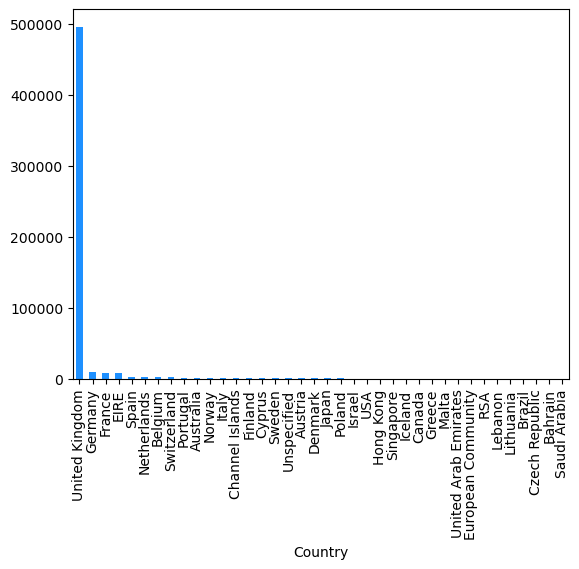

In [17]:
df['Country'].value_counts().plot.bar(color='dodgerblue');

In [18]:
df['Country'].nunique()

38

So we have approximately 1 year data record of 25,900 purchases for 4,372 unique users made in 38 countries (mostly in the UK)

### Quantity and unit price of the products

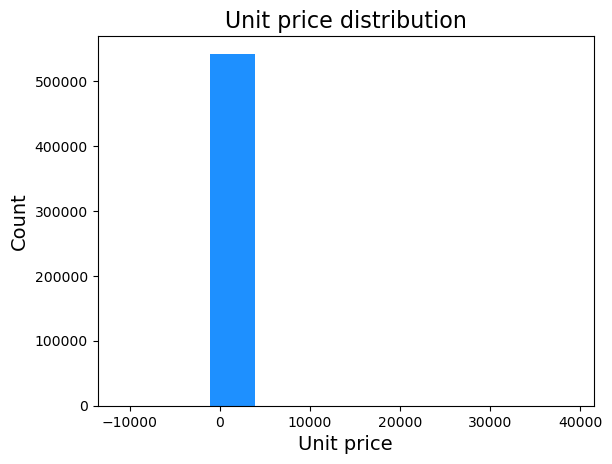

In [19]:
# Let's look at the price distribution of the products

plt.hist(data=df, x='UnitPrice', color='dodgerblue')
plt.xlabel('Unit price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Unit price distribution", fontsize=16);

It seems that we have negative values and some outliers representing very expensive products. The negative values may be associated with cancelled or refunded orders. Let's remove negative records and outliers and look at the price distribution.

In [20]:
df['UnitPrice'].describe(percentiles=[.99])

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
50%           2.080000
99%          18.000000
max       38970.000000
Name: UnitPrice, dtype: float64

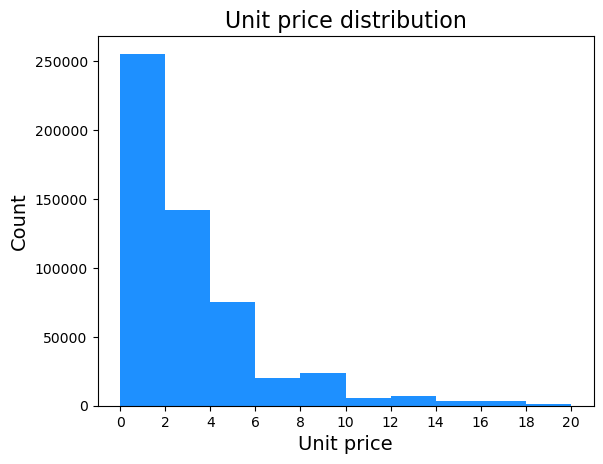

In [21]:
bins = np.arange(0, 21, 2)
ticks = np.arange(0, 21, 2)
plt.hist(data=df, x='UnitPrice', bins=bins, color='dodgerblue')
plt.xticks(ticks, ticks)
plt.xlabel('Unit price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Unit price distribution', fontsize=16);

The price for most of the products is equal or less than 10£

Let's look at the negative values in *UnitPrice*

In [22]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


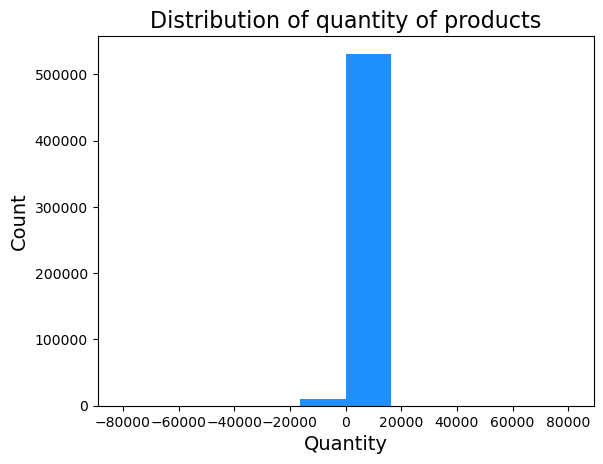

In [23]:
# Let's look at the quantity of the products

plt.hist(data=df, x='Quantity', color='dodgerblue')
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Distribution of quantity of products", fontsize=16);

In [24]:
df['Quantity'].describe(percentiles=[.99])

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
50%           3.000000
99%         100.000000
max       80995.000000
Name: Quantity, dtype: float64

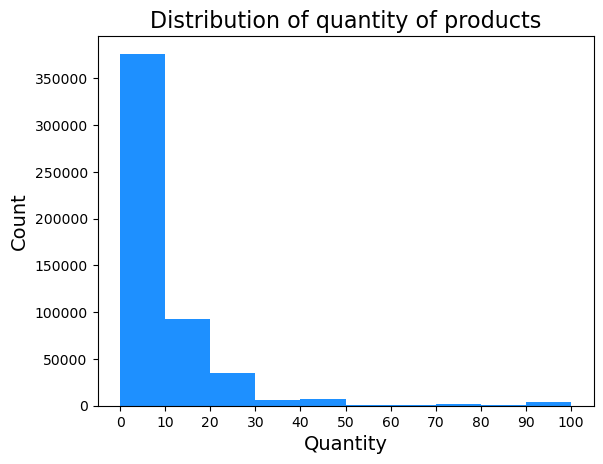

In [25]:
bins = np.arange(0, 110, 10)
ticks = np.arange(0, 110, 10)
plt.hist(data=df, x='Quantity', bins=bins, color='dodgerblue')
plt.xticks(ticks, ticks)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of quantity of products', fontsize=16);

In most cases customers buy less than 50 items per order.

Let's look at the negative values in *Quantity*

In [26]:
neg_quantity = df[df['Quantity']<0]

In [27]:
neg_quantity.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom


In [28]:
neg_quantity.shape

(10624, 8)

In [29]:
print("The percentage of records with negative Quantity:", neg_quantity.shape[0]*100/df.shape[0])

The percentage of records with negative Quantity: 1.9604767590130445


There are 10,624 raws with negative *Quantity* values, which is about 2% out of the total number of records in the dataframe.

<a id='datacleaning'></a>
## Data cleaning and transformation

### Drop NULL values

We have NULL records in columns *CustomerId* and *Description*. Because we are planning to predict CLTV, we need records for each customer ID to proceed calculations. Let's drop rows containing NULL values.

In [30]:
df.dropna(subset=['CustomerID'], inplace=True)

In [31]:
df.shape

(406829, 8)

In [32]:
# Let's check NULL records in the CustomerId column
df['CustomerID'].isnull().sum()

0

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


### Handle negative quantity

In [34]:
df = df.loc[df['Quantity'] > 0]

In [35]:
# Let's check negative records
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


### Remove rows with negative price

In [36]:
df = df.loc[df['UnitPrice'] > 0]

In [37]:
# Let's check negative records
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


### Handle incomplete data

Period of time for the purchase records is from December 1, 2010 to December  9, 2011. The data for the last month is incomplete. Because we are planning to predict CLTV for the next 3 months and we will be aggregating data monthly, let us ignore the records for the incomplete month.

In [38]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [39]:
# Let's check the time period
df['InvoiceDate'].min(), df['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-11-30 17:37:00'))

### Calculate total sales

Let us create a column for the total sales value for each transaction

In [40]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [41]:
df_orders = df.groupby(['CustomerID', 'InvoiceNo']).agg({'Sales': sum, 'InvoiceDate': max})

In [42]:
df_orders.head(8)

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00
           562032       584.91 2011-08-02 08:48:00
           573511      1294.32 2011-10-31 12:25:00
12348.0    539318       892.80 2010-12-16 19:09:00

In [43]:
df_orders['InvoiceDate'].max(), df_orders['InvoiceDate'].min()

(Timestamp('2011-11-30 17:37:00'), Timestamp('2010-12-01 08:26:00'))

<a id='dataanalysis'></a>
## Data analysis

In order to predict and calculate CLTV, we have to estimate the **frequency**, **recency**, and **total amount** of purchases by each customer. We are going to determine basic information about each customer's average and lifetime purchase amount, as well as each customer's duration and frequency of purchase.

In [44]:
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    return (x.max() - x.min()).days / x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

In [45]:
df_summary = df_orders.reset_index().groupby('CustomerID').agg({
            'Sales': [min, max, sum, groupby_mean, groupby_count],
            'InvoiceDate': [min, max, purchase_duration, avg_frequency]
             })

In [46]:
df_summary.head()

Sales                                          \
                 min       max       sum           avg count   
CustomerID                                                     
12346.0     77183.60  77183.60  77183.60  77183.600000     1   
12347.0       382.52   1294.32   4085.18    680.863333     6   
12348.0       227.44    892.80   1797.24    449.310000     4   
12349.0      1757.55   1757.55   1757.55   1757.550000     1   
12350.0       334.40    334.40    334.40    334.400000     1   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12346.0    2011-01-18 10:01:00 2011-01-18 10:01:00                 0   
12347.0    2010-12-07 14:57:00 2011-10-31 12:25:00               327   
12348.0    2010-12-16 19:09:00 2011-09-25 13:13:00               282   
12349.0    2011-11-21 09:51:00 2011-11-21 09:51:00                 0   
12350.0    2011-02-02 16:01:00 2011-02-02 16:01:00                 0   

                               
           purchase_frequency  
CustomerID                     
12346.0                   0.0  
12347.0                  54.5  
12348.0                  70.5  
12349.0                   0.0  
12350.0                   0.0

This data gives us an idea on the purchases each customer made.

Let us have a closer look at the **repeat customers**. Particularly, we are interested in the **number of purchases** and **frequency of purchases** made.  

### Repeat customers

#### Number of purchases

In [47]:
df_summary.columns = ['_'.join(col).lower() for col in df_summary.columns]

In [48]:
df_summary

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12346.0,77183.60,77183.60,77183.60,77183.600000,1,2011-01-18 10:01:00,2011-01-18 10:01:00,0,0.000000
12347.0,382.52,1294.32,4085.18,680.863333,6,2010-12-07 14:57:00,2011-10-31 12:25:00,327,54.500000
12348.0,227.44,892.80,1797.24,449.310000,4,2010-12-16 19:09:00,2011-09-25 13:13:00,282,70.500000
12349.0,1757.55,1757.55,1757.55,1757.550000,1,2011-11-21 09:51:00,2011-11-21 09:51:00,0,0.000000
12350.0,334.40,334.40,334.40,334.400000,1,2011-02-02 16:01:00,2011-02-02 16:01:00,0,0.000000
...,...,...,...,...,...,...,...,...,...
18280.0,180.60,180.60,180.60,180.600000,1,2011-03-07 09:52:00,2011-03-07 09:52:00,0,0.000000
18281.0,80.82,80.82,80.82,80.820000,1,2011-06-12 10:53:00,2011-06-12 10:53:00,0,0.000000
18282.0,100.21,100.21,100.21,100.210000,1,2011-08-05 13:35:00,2011-08-05 13:35:00,0,0.000000


In [49]:
df_summary = df_summary.loc[df_summary['invoicedate_purchase_duration'] > 0]

In [50]:
df_summary.shape

(2692, 9)

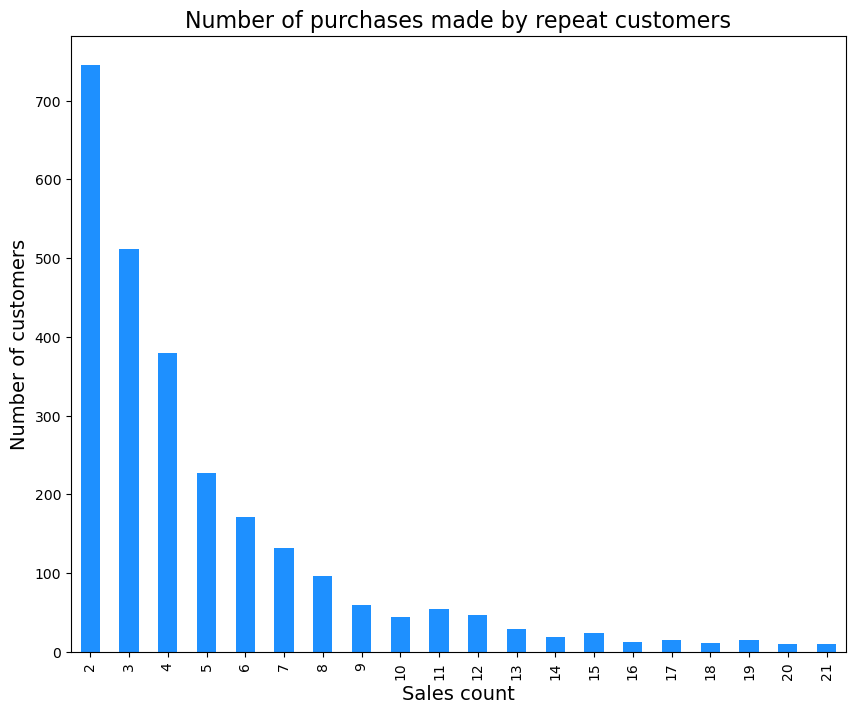

In [51]:
# Let's look at the number of purchases
ax = df_summary.groupby('sales_count').count()['sales_avg'][:20].plot(
        kind='bar', 
        color='dodgerblue', 
        figsize=(10,8), 
        grid=False)
plt.xlabel('Sales count', fontsize=14)
plt.ylabel('Number of customers', fontsize=14)
plt.title('Number of purchases made by repeat customers', fontsize=16);

In our analysis, we consider repeat customers who made at least 2 purchases. As you can see, repeat customers tend to make about 12 purchases or less.

#### Average number of days between purchases 

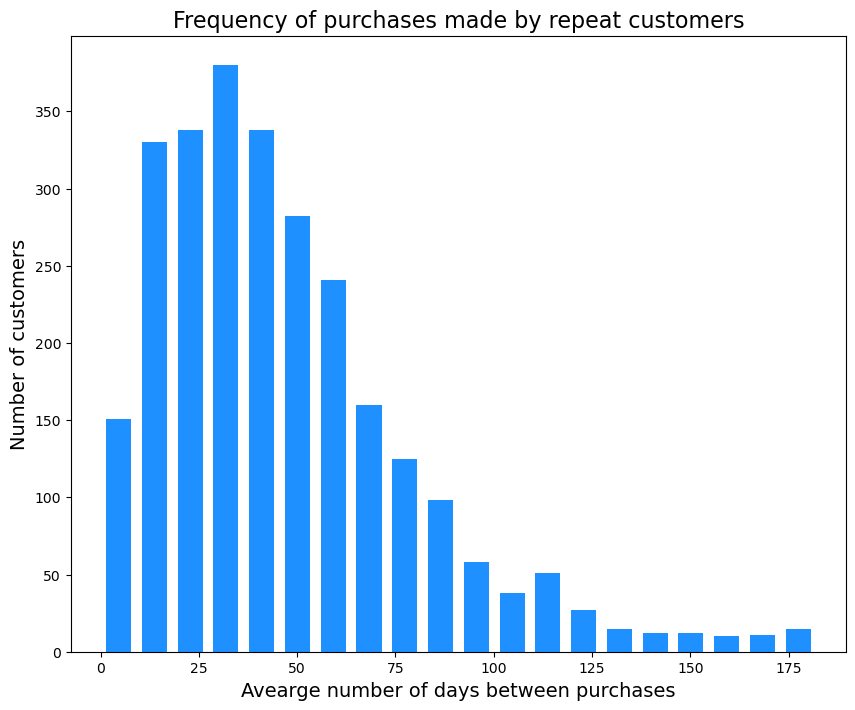

In [52]:
ax = df_summary['invoicedate_purchase_frequency'].hist(
        bins=20,
        color='dodgerblue',
        rwidth=0.7,
        figsize=(10,8),
        grid=False)
plt.xlabel('Avearge number of days between purchases', fontsize=14)
plt.ylabel('Number of customers', fontsize=14)
plt.title('Frequency of purchases made by repeat customers', fontsize=16);

As you can see from this plot, the majority of repeat customers tend to make a purchase every 12 to 50 days.

<a id='predictcltv'></a>
## Predict 3-month CLTV

We are going to build a model, which predicts CLTV for 3 months. First, let us slice the data into chunks with 3-month data each and take the last chunk as the target for predictions.

### Prepare data

In [53]:
clv_freq = '3M'

In [54]:
df_data = df_orders.reset_index().groupby([
            'CustomerID',
            pd.Grouper(key='`', freq=clv_freq)
            ]).agg({'Sales': [sum, groupby_mean, groupby_count],})

In [55]:
df_data.columns = ['_'.join(col).lower() for col in df_data.columns]

In [56]:
df_data = df_data.reset_index()

In [57]:
df_data.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12346.0,2011-03-31,77183.60,77183.600,1
1,12347.0,2010-12-31,711.79,711.790,1
2,12347.0,2011-03-31,475.39,475.390,1
3,12347.0,2011-06-30,1018.77,509.385,2
4,12347.0,2011-09-30,584.91,584.910,1


In [58]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9219 entries, 0 to 9218
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerID   9219 non-null   float64       
 1   InvoiceDate  9219 non-null   datetime64[ns]
 2   sales_sum    9219 non-null   float64       
 3   sales_avg    9219 non-null   float64       
 4   sales_count  9219 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 360.2 KB


For further simplicity, let us encode *InvoiceDate* column and define in which month a purchase was made

In [59]:
map_date_month = {str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(
                    sorted(df_data.reset_index()['InvoiceDate'].unique(), reverse=True))}

In [60]:
map_date_month

{'2011-12-31': 'M_1',
 '2011-09-30': 'M_2',
 '2011-06-30': 'M_3',
 '2011-03-31': 'M_4',
 '2010-12-31': 'M_5'}

In [61]:
df_data['M'] = df_data['InvoiceDate'].apply(lambda x: map_date_month[str(x)[:10]])

In [62]:
df_data.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12346.0,2011-03-31,77183.60,77183.600,1,M_4
1,12347.0,2010-12-31,711.79,711.790,1,M_5
2,12347.0,2011-03-31,475.39,475.390,1,M_4
3,12347.0,2011-06-30,1018.77,509.385,2,M_3
4,12347.0,2011-09-30,584.91,584.910,1,M_2


In [63]:
# Number of purchases made in each chunk
df_data['M'].value_counts()

M
M_1    2406
M_2    2161
M_3    1991
M_4    1776
M_5     885
Name: count, dtype: int64

We marked data with a chunk/time period it belongs to. Now, let us create a set with features and target variables. In order to train a model, we have to transfrom the data into tabular data, where each row represent a costomer and each column represent a feature.

In [64]:
df_features = pd.pivot_table(
                df_data.loc[df_data['M'] != 'M_1'], 
                values=['sales_sum', 'sales_avg', 'sales_count'], 
                columns='M', 
                index='CustomerID')

In [65]:
df_features.reset_index()

CustomerID   sales_avg                                sales_count       \
M                       M_2      M_3           M_4     M_5         M_2  M_3   
0       12346.0         NaN      NaN  77183.600000     NaN         NaN  NaN   
1       12347.0  584.910000  509.385    475.390000  711.79         1.0  2.0   
2       12348.0  310.000000  367.000    227.440000  892.80         1.0  1.0   
3       12350.0         NaN      NaN    334.400000     NaN         NaN  NaN   
4       12352.0  316.250000      NaN    312.362000     NaN         2.0  NaN   
...         ...         ...      ...           ...     ...         ...  ...   
3611    18280.0         NaN      NaN    180.600000     NaN         NaN  NaN   
3612    18281.0         NaN   80.820           NaN     NaN         NaN  1.0   
3613    18282.0  100.210000      NaN           NaN     NaN         1.0  NaN   
3614    18283.0   92.696667  131.170    105.966667     NaN         3.0  4.0   
3615    18287.0         NaN  765.280           NaN     NaN         NaN  1.0   

               sales_sum                             
M     M_4  M_5       M_2      M_3       M_4     M_5  
0     1.0  NaN       NaN      NaN  77183.60     NaN  
1     1.0  1.0    584.91  1018.77    475.39  711.79  
2     1.0  1.0    310.00   367.00    227.44  892.80  
3     1.0  NaN       NaN      NaN    334.40     NaN  
4     5.0  NaN    632.50      NaN   1561.81     NaN  
...   ...  ...       ...      ...       ...     ...  
3611  1.0  NaN       NaN      NaN    180.60     NaN  
3612  NaN  NaN       NaN    80.82       NaN     NaN  
3613  NaN  NaN    100.21      NaN       NaN     NaN  
3614  3.0  NaN    278.09   524.68    317.90     NaN  
3615  NaN  NaN       NaN   765.28       NaN     NaN  

[3616 rows x 13 columns]

In [66]:
df_features.columns = ['_'.join(col) for col in df_features.columns]

In [67]:
df_features.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346.0,NaN,NaN,77183.600,NaN,NaN,NaN,1.0,NaN,NaN,NaN,77183.60,NaN
12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
12350.0,NaN,NaN,334.400,NaN,NaN,NaN,1.0,NaN,NaN,NaN,334.40,NaN
12352.0,316.25,NaN,312.362,NaN,2.0,NaN,5.0,NaN,632.50,NaN,1561.81,NaN


In [68]:
df_features.reset_index(level=0, inplace=True)

In [69]:
df_features.head()

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
0,12346.0,NaN,NaN,77183.600,NaN,NaN,NaN,1.0,NaN,NaN,NaN,77183.60,NaN
1,12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
2,12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
3,12350.0,NaN,NaN,334.400,NaN,NaN,NaN,1.0,NaN,NaN,NaN,334.40,NaN
4,12352.0,316.25,NaN,312.362,NaN,2.0,NaN,5.0,NaN,632.50,NaN,1561.81,NaN


We got Null values after pivoting the table. Let us fill in the Null values with 0.

In [70]:
df_features.fillna(0, inplace=True)

In [71]:
# Let's check the Null values
df_features.isnull().sum().sum()

0

In [72]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       3616 non-null   float64
 1   sales_avg_M_2    3616 non-null   float64
 2   sales_avg_M_3    3616 non-null   float64
 3   sales_avg_M_4    3616 non-null   float64
 4   sales_avg_M_5    3616 non-null   float64
 5   sales_count_M_2  3616 non-null   float64
 6   sales_count_M_3  3616 non-null   float64
 7   sales_count_M_4  3616 non-null   float64
 8   sales_count_M_5  3616 non-null   float64
 9   sales_sum_M_2    3616 non-null   float64
 10  sales_sum_M_3    3616 non-null   float64
 11  sales_sum_M_4    3616 non-null   float64
 12  sales_sum_M_5    3616 non-null   float64
dtypes: float64(13)
memory usage: 367.4 KB


In [73]:
df_features.head()

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
0,12346.0,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00
1,12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
2,12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
3,12350.0,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00
4,12352.0,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00


Our target variables will be:

In [74]:
df_target = df_data.loc[df_data['M'] == 'M_1', ['CustomerID', 'sales_sum']]

In [75]:
df_target.columns = ['CustomerID', 'CLV_'+clv_freq]

In [76]:
df_target.shape

(2406, 2)

In [77]:
df_target.head()

,CustomerID,CLV_3M
5,12347.0,1294.32
10,12349.0,1757.55
14,12352.0,311.73
20,12356.0,58.35
21,12357.0,6207.67


In [78]:
df_sample_set = df_features.merge(
                df_target, 
                left_on='CustomerID', 
                right_on='CustomerID',
                how='left')

In [79]:
df_sample_set.head()

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CLV_3M
0,12346.0,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,NaN
1,12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,1294.32
2,12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80,NaN
3,12350.0,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00,NaN
4,12352.0,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00,311.73


In [80]:
df_sample_set.fillna(0, inplace=True)

In [81]:
df_sample_set.head()

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CLV_3M
0,12346.0,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,0.00
1,12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,1294.32
2,12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80,0.00
3,12350.0,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00,0.00
4,12352.0,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00,311.73


In [82]:
df_sample_set['CLV_3M'].describe()

count     3616.000000
mean       511.558520
std       2371.743293
min          0.000000
25%          0.000000
50%          0.000000
75%        458.662500
max      68012.350000
Name: CLV_3M, dtype: float64

### Build linear regression

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [84]:
target_var = 'CLV_3M'
all_features = [x for x in df_sample_set.columns if x not in ['CustomerID', target_var]]

In [85]:
all_features

['sales_avg_M_2',
 'sales_avg_M_3',
 'sales_avg_M_4',
 'sales_avg_M_5',
 'sales_count_M_2',
 'sales_count_M_3',
 'sales_count_M_4',
 'sales_count_M_5',
 'sales_sum_M_2',
 'sales_sum_M_3',
 'sales_sum_M_4',
 'sales_sum_M_5']

In [86]:
df_sample_set

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CLV_3M
0,12346.0,0.000000,0.000,77183.600000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,0.00
1,12347.0,584.910000,509.385,475.390000,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,1294.32
2,12348.0,310.000000,367.000,227.440000,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80,0.00
3,12350.0,0.000000,0.000,334.400000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00,0.00
4,12352.0,316.250000,0.000,312.362000,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00,311.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3611,18280.0,0.000000,0.000,180.600000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,180.60,0.00,0.00
3612,18281.0,0.000000,80.820,0.000000,0.00,0.0,1.0,0.0,0.0,0.00,80.82,0.00,0.00,0.00
3613,18282.0,100.210000,0.000,0.000000,0.00,1.0,0.0,0.0,0.0,100.21,0.00,0.00,0.00,0.00
3614,18283.0,92.696667,131.170,105.966667,0.00,3.0,4.0,3.0,0.0,278.09,524.68,317.90,0.00,766.21


In [87]:
X_train, X_test, y_train, y_test = train_test_split(
                                    df_sample_set[all_features], 
                                    df_sample_set[target_var], 
                                    random_state=2,
                                    test_size=0.35)

In [88]:
lin_reg = LinearRegression(n_jobs=1)

In [89]:
lin_reg.fit(X_train, y_train)

LinearRegression(n_jobs=1)

In [90]:
lin_reg.intercept_

-17.526580313490854

In [91]:
coef = pd.DataFrame(list(zip(all_features, lin_reg.coef_)))
coef.columns = ['feature', 'coef']

In [92]:
coef

,feature,coef
0,sales_avg_M_2,0.211380
1,sales_avg_M_3,-0.059222
2,sales_avg_M_4,0.091413
3,sales_avg_M_5,-0.581033
4,sales_count_M_2,128.559625
5,sales_count_M_3,-55.323992
6,sales_count_M_4,18.092563
7,sales_count_M_5,-39.690706
8,sales_sum_M_2,0.251125
9,sales_sum_M_3,0.377412


### Evaluate the model

In [93]:
from sklearn.metrics import r2_score, median_absolute_error

In [94]:
train_preds =  lin_reg.predict(X_train)
test_preds = lin_reg.predict(X_test)

#### R-Squared

In [95]:
print('R-Squared for Train set: %0.2f' % r2_score(y_true=y_train, y_pred=train_preds))
print('R-Squared for Test set: %0.2f' % r2_score(y_true=y_test, y_pred=test_preds))

R-Squared for Train set: 0.71
R-Squared for Test set: 0.71


R-Squared is the same for the train and test sets. Therefore, we do not have any overfitting or underfitting of the model.

#### Median Absolute Error

In [96]:
print('MedAE for Train set: %0.2f' % median_absolute_error(y_true=y_train, y_pred=train_preds))
print('MedAE for Test set: %0.2f' % median_absolute_error(y_true=y_test, y_pred=test_preds))

MedAE for Train set: 202.41
MedAE for Test set: 205.20


MedAE has a small difference between test and train sets.

#### Scatter plot

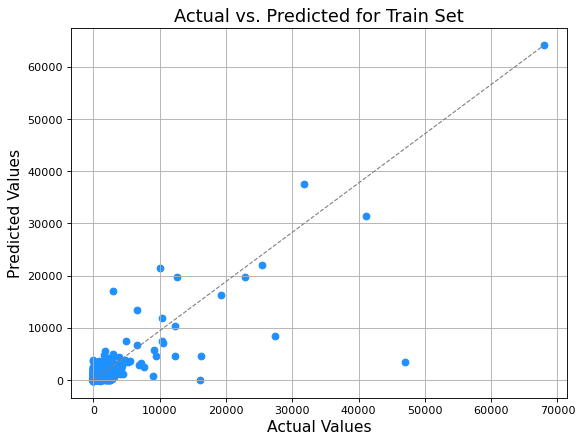

In [97]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(y_train, train_preds, color='dodgerblue')
plt.plot([0, max(y_train)], [0, max(train_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs. Predicted for Train Set', fontsize=16)
plt.grid()

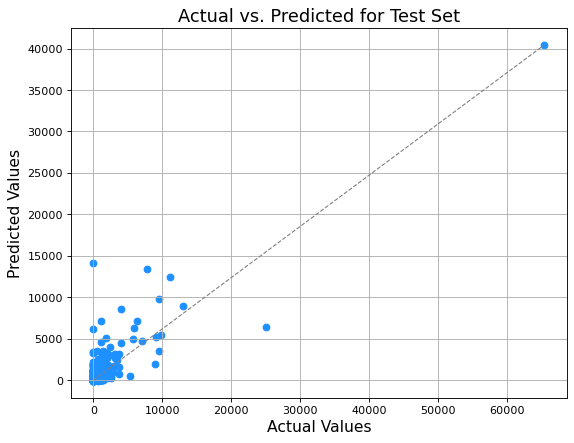

In [98]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(y_test, test_preds, color='dodgerblue')
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs. Predicted for Test Set', fontsize=16)
plt.grid()

As you can see on this plot, the x-axis is the actual values and the y-axis represents the predicted values. Closer the dots are located to the straight diagonal line, better predictions are.

<a id='summary'></a>
## Summary

* Based on the data analysis, we found that the repeat customers tend to make about 12 purchases or less within a year and the majority of repeat customers tend to make a purchase every 12 to 50 days
* We predicted 3-month CLTV for customers of the online retail using linear regression
* R-squared value for the test set is 0.71, which is not great but it is a good benchmark to try other regression models such as Epsilon-Support Vector Regression and Random Forest Regressor
* By knowing CLTV, we can develop positive ROI strategies and make decisions about how much money to invest in acquiring new customers and retaining existing ones.

<a id='reference'></a>
## References

1. Hwang, Y. H. (2019). Hands-on data science for marketing: Improve your marketing strategies with machine learning using Python and R. Birmingham, UK: Packt Publishing.
2. Müller, A. C., &amp; Guido, S. (2018). Introduction to machine learning with Python: A guide for data scientists. Sebastopol, CA: O'Reilly Media.
3. Jeffery, M. (2010). Data-driven marketing the 15 metrics everyone in marketing should know. Hoboken (N.J.), Canada: John Wiley.
4. Customer lifetime Value (CLV) definition - what is customer lifetime Value (CLV). (n.d.). Retrieved February 07, 2021, from https://www.shopify.com/encyclopedia/customer-lifetime-value-clv#:~:text=The%20lifetime%20value%20of%20a,your%20products%2C%20during%20their%20lifetime.